In [911]:
#  !pip install nltk
#  !pip install spacey
        

In [912]:
import pandas as pb
import re
# import spacy
import string
import nltk

# nltk.download()
from nltk.corpus import stopwords
# from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


sid = SentimentIntensityAnalyzer()

In [913]:
pwd

'C:\\Users\\waheed\\Downloads\\vader\\zip'

In [914]:
print(pb)

<module 'pandas' from 'C:\\Users\\waheed\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>


In [915]:
df = pb.read_csv('vaccination.csv')

In [916]:
#df=df[:20000]
df

id             user_name              user_location  \
0       1.340540e+18            Rachel Roh  La Crescenta-Montrose, CA   
1       1.338160e+18           Albert Fong          San Francisco, CA   
2       1.337860e+18              eli🇱🇹🇪🇺👌                   Your Bed   
3       1.337860e+18         Charles Adler     Vancouver, BC - Canada   
4       1.337850e+18  Citizen News Channel                        NaN   
...              ...                   ...                        ...   
152411  1.418820e+18            MGILIJACCC                   S/AFRICA   
152412  1.418810e+18                VaxBLR           Bengaluru, India   
152413  1.418810e+18                VaxBLR           Bengaluru, India   
152414  1.418810e+18                VaxBLR           Bengaluru, India   
152415  1.418810e+18                VaxBLR           Bengaluru, India   

                                         user_description      user_created  \
0       Aggregator of Asian American news; scanning di...  08-04-2009 17:52   
1       Marketing dude, tech geek, heavy metal & '80s ...  21-09-2009 15:27   
2                                          heil, hydra 🖐☺  25-06-2020 23:30   
3       Hosting "CharlesAdlerTonight" Global News Radi...  10-09-2008 11:28   
4       Citizen News Channel bringing you an alternati...  23-04-2020 17:58   
...                                                   ...               ...   
152411                                                NaN  19-08-2012 16:47   
152412  Hourly updates on FREE and PAID 18+ and 45+ va...  21-06-2021 08:44   
152413  Hourly updates on FREE and PAID 18+ and 45+ va...  21-06-2021 08:44   
152414  Hourly updates on FREE and PAID 18+ and 45+ va...  21-06-2021 08:44   
152415  Hourly updates on FREE and PAID 18+ and 45+ va...  21-06-2021 08:44   

        user_followers  user_friends  user_favourites  user_verified  \
0                  405          1692             3247          False   
1                  834           666              178          False   
2                   10            88              155          False   
3                49165          3933            21853           True   
4                  152           580             1473          False   
...                ...           ...              ...            ...   
152411            3132          1068            44826          False   
152412              13             0                0          False   
152413              13             0                0          False   
152414              13             0                0          False   
152415              13             0                0          False   

              tweet_date                                         tweet_text  \
0       20-12-2020 06:06  Same folks said daikon paste could treat a cyt...   
1       13-12-2020 16:27  While the world has been on the wrong side of ...   
2       12-12-2020 20:33  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3       12-12-2020 20:23  Facts are immutable, Senator, even when you're...   
4       12-12-2020 20:17  Explain to me again why we need a vaccine @Bor...   
...                  ...                                                ...   
152411  24-07-2021 06:29  @karynmaughan There are many vaccinated with #...   
152412  24-07-2021 06:00  45+ #BBMP #Bengaluru #CovidVaccine Availabilit...   
152413  24-07-2021 06:00  45+ #URBAN #Bengaluru #CovidVaccine Availabili...   
152414  24-07-2021 05:30  18-44 #BBMP #Bengaluru #CovidVaccine Availabil...   
152415  24-07-2021 05:30  18-44 #URBAN #Bengaluru #CovidVaccine Availabi...   

                                                 hashtags  \
0                                      ['PfizerBioNTech']   
1                                                     NaN   
2       ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...   
3                                                     NaN   
4          ['whereareallthesickpeople', 'PfizerBioNTech']   
...         

In [917]:
df_refined = df[['id','user_name','tweet_date','tweet_text']]
df_refined

id             user_name        tweet_date  \
0       1.340540e+18            Rachel Roh  20-12-2020 06:06   
1       1.338160e+18           Albert Fong  13-12-2020 16:27   
2       1.337860e+18              eli🇱🇹🇪🇺👌  12-12-2020 20:33   
3       1.337860e+18         Charles Adler  12-12-2020 20:23   
4       1.337850e+18  Citizen News Channel  12-12-2020 20:17   
...              ...                   ...               ...   
152411  1.418820e+18            MGILIJACCC  24-07-2021 06:29   
152412  1.418810e+18                VaxBLR  24-07-2021 06:00   
152413  1.418810e+18                VaxBLR  24-07-2021 06:00   
152414  1.418810e+18                VaxBLR  24-07-2021 05:30   
152415  1.418810e+18                VaxBLR  24-07-2021 05:30   

                                               tweet_text  
0       Same folks said daikon paste could treat a cyt...  
1       While the world has been on the wrong side of ...  
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...  
3       Facts are immutable, Senator, even when you're...  
4       Explain to me again why we need a vaccine @Bor...  
...                                                   ...  
152411  @karynmaughan There are many vaccinated with #...  
152412  45+ #BBMP #Bengaluru #CovidVaccine Availabilit...  
152413  45+ #URBAN #Bengaluru #CovidVaccine Availabili...  
152414  18-44 #BBMP #Bengaluru #CovidVaccine Availabil...  
152415  18-44 #URBAN #Bengaluru #CovidVaccine Availabi...  

[152416 rows x 4 columns]

In [918]:
df_refined['tweet_text'].head()

0    Same folks said daikon paste could treat a cyt...
1    While the world has been on the wrong side of ...
2    #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3    Facts are immutable, Senator, even when you're...
4    Explain to me again why we need a vaccine @Bor...
Name: tweet_text, dtype: object

In [919]:
df_refined['tweet_text'].str.lower()

0         same folks said daikon paste could treat a cyt...
1         while the world has been on the wrong side of ...
2         #coronavirus #sputnikv #astrazeneca #pfizerbio...
3         facts are immutable, senator, even when you're...
4         explain to me again why we need a vaccine @bor...
                                ...                        
152411    @karynmaughan there are many vaccinated with #...
152412    45+ #bbmp #bengaluru #covidvaccine availabilit...
152413    45+ #urban #bengaluru #covidvaccine availabili...
152414    18-44 #bbmp #bengaluru #covidvaccine availabil...
152415    18-44 #urban #bengaluru #covidvaccine availabi...
Name: tweet_text, Length: 152416, dtype: object

In [920]:
def cleaning_data(data):
    #remove punc from filtered
    data = data.split()
    clean_filter=[]
    for word in data:
        new_word = re.sub(r'\W+','', word)
        new_word = re.sub(r'http\S+','',new_word)
        if new_word != "":
            clean_filter.append(new_word)
  

    clean_text = " ".join(clean_filter)
    
    return clean_text
   

In [921]:
cleaned = [cleaning_data(i) for i in df_refined['tweet_text']]
cleaned[:20]


['Same folks said daikon paste could treat a cytokine storm PfizerBioNTech',
 'While the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev',
 'coronavirus SputnikV AstraZeneca PfizerBioNTech Moderna Covid_19 Russian vaccine is created to last 24 years',
 'Facts are immutable Senator even when youre not ethically sturdy enough to acknowledge them 1 You were born i',
 'Explain to me again why we need a vaccine BorisJohnson MattHancock whereareallthesickpeople PfizerBioNTech',
 'Does anyone have any useful adviceguidance for whether the COVID vaccine is safe whilst breastfeeding',
 'it is a bit sad to claim the fame for success of vaccination on patriotic competition between USA Canada UK and',
 'There have not been many bright days in 2020 but here are some of the best 1 BidenHarris winning Election2020',
 'Covid vaccine You getting it CovidVaccine covid19 PfizerBioNTech Moderna',
 'CovidVaccine States will start getting COVID19Vaccine

In [922]:
df_refined['punc_text'] = cleaned

<ipython-input-922-dd4ef6c0b9b6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [923]:
df_refined

id             user_name        tweet_date  \
0       1.340540e+18            Rachel Roh  20-12-2020 06:06   
1       1.338160e+18           Albert Fong  13-12-2020 16:27   
2       1.337860e+18              eli🇱🇹🇪🇺👌  12-12-2020 20:33   
3       1.337860e+18         Charles Adler  12-12-2020 20:23   
4       1.337850e+18  Citizen News Channel  12-12-2020 20:17   
...              ...                   ...               ...   
152411  1.418820e+18            MGILIJACCC  24-07-2021 06:29   
152412  1.418810e+18                VaxBLR  24-07-2021 06:00   
152413  1.418810e+18                VaxBLR  24-07-2021 06:00   
152414  1.418810e+18                VaxBLR  24-07-2021 05:30   
152415  1.418810e+18                VaxBLR  24-07-2021 05:30   

                                               tweet_text  \
0       Same folks said daikon paste could treat a cyt...   
1       While the world has been on the wrong side of ...   
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3       Facts are immutable, Senator, even when you're...   
4       Explain to me again why we need a vaccine @Bor...   
...                                                   ...   
152411  @karynmaughan There are many vaccinated with #...   
152412  45+ #BBMP #Bengaluru #CovidVaccine Availabilit...   
152413  45+ #URBAN #Bengaluru #CovidVaccine Availabili...   
152414  18-44 #BBMP #Bengaluru #CovidVaccine Availabil...   
152415  18-44 #URBAN #Bengaluru #CovidVaccine Availabi...   

                                                punc_text  
0       Same folks said daikon paste could treat a cyt...  
1       While the world has been on the wrong side of ...  
2       coronavirus SputnikV AstraZeneca PfizerBioNTec...  
3       Facts are immutable Senator even when youre no...  
4       Explain to me again why we need a vaccine Bori...  
...                                                   ...  
152411  karynmaughan There are many vaccinated with CR...  
152412  45 BBMP Bengaluru CovidVaccine Availability fo...  
152413  45 URBAN Bengaluru CovidVaccine Availability f...  
152414  1844 BBMP Bengaluru CovidVaccine Availability ...  
152415  1844 URBAN Bengaluru CovidVaccine Availability...  

[152416 rows x 5 columns]

In [924]:
 sid.polarity_scores(df_refined['punc_text'][0])

{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}

In [925]:
df_refined.loc[:,('scores')] = df_refined['punc_text'].apply(lambda punc_text: sid.polarity_scores(punc_text))

C:\Users\waheed\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\waheed\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [926]:
df_refined.loc[:,('compound')]  = df_refined['scores'].apply(lambda score_dict: score_dict['compound'])

In [927]:
df_refined.loc[:,('sentiment')] = df_refined['compound'].apply(lambda sent: 'positive' if sent >0 else('negative' if sent <0 else 'neuteral'))
df_refined['sentiment_bin'] = df_refined['sentiment'].apply(lambda x: 1 if x =="positive" else(-1 if x=="negative" else 0))
df_refined

<ipython-input-927-299a6ba48ab1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id             user_name        tweet_date  \
0       1.340540e+18            Rachel Roh  20-12-2020 06:06   
1       1.338160e+18           Albert Fong  13-12-2020 16:27   
2       1.337860e+18              eli🇱🇹🇪🇺👌  12-12-2020 20:33   
3       1.337860e+18         Charles Adler  12-12-2020 20:23   
4       1.337850e+18  Citizen News Channel  12-12-2020 20:17   
...              ...                   ...               ...   
152411  1.418820e+18            MGILIJACCC  24-07-2021 06:29   
152412  1.418810e+18                VaxBLR  24-07-2021 06:00   
152413  1.418810e+18                VaxBLR  24-07-2021 06:00   
152414  1.418810e+18                VaxBLR  24-07-2021 05:30   
152415  1.418810e+18                VaxBLR  24-07-2021 05:30   

                                               tweet_text  \
0       Same folks said daikon paste could treat a cyt...   
1       While the world has been on the wrong side of ...   
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3       Facts are immutable, Senator, even when you're...   
4       Explain to me again why we need a vaccine @Bor...   
...                                                   ...   
152411  @karynmaughan There are many vaccinated with #...   
152412  45+ #BBMP #Bengaluru #CovidVaccine Availabilit...   
152413  45+ #URBAN #Bengaluru #CovidVaccine Availabili...   
152414  18-44 #BBMP #Bengaluru #CovidVaccine Availabil...   
152415  18-44 #URBAN #Bengaluru #CovidVaccine Availabi...   

                                                punc_text  \
0       Same folks said daikon paste could treat a cyt...   
1       While the world has been on the wrong side of ...   
2       coronavirus SputnikV AstraZeneca PfizerBioNTec...   
3       Facts are immutable Senator even when youre no...   
4       Explain to me again why we need a vaccine Bori...   
...                                                   ...   
152411  karynmaughan There are many vaccinated with CR...   
152412  45 BBMP Bengaluru CovidVaccine Availability fo...   
152413  45 URBAN Bengaluru CovidVaccine Availability f...   
152414  1844 BBMP Bengaluru CovidVaccine Availability ...   
152415  1844 URBAN Bengaluru CovidVaccine Availability...   

                                                   scores  compound sentiment  \
0       {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...    0.4019  positive   
1       {'neg': 0.13, 'neu': 0.756, 'pos': 0.113, 'com...   -0.1027  negative   
2       {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...    0.2500  positive   
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  neuteral   
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  neuteral   
...                                                   ...       ...       ...   
152411  {'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'comp...   -0.7430  negative   
152412  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...    0.6166  positive   
152413  {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...    0.6166  positive   
152414  {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...    0.6166  positive   
152415  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...    0.6166  positive   

        sentiment_bin  
0                   1  
1                  -1  
2                   1  
3                   0  
4                   0  
...               ...  
152411             -1  
152412              1  
152413              1  
152414              1  
152415              1  

[152416 rows x 9 columns]

In [928]:
df_refined['vaccine'] = df_refined.apply(lambda _: '', axis=1)
df_refined

<ipython-input-928-1dff67dbadd8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id             user_name        tweet_date  \
0       1.340540e+18            Rachel Roh  20-12-2020 06:06   
1       1.338160e+18           Albert Fong  13-12-2020 16:27   
2       1.337860e+18              eli🇱🇹🇪🇺👌  12-12-2020 20:33   
3       1.337860e+18         Charles Adler  12-12-2020 20:23   
4       1.337850e+18  Citizen News Channel  12-12-2020 20:17   
...              ...                   ...               ...   
152411  1.418820e+18            MGILIJACCC  24-07-2021 06:29   
152412  1.418810e+18                VaxBLR  24-07-2021 06:00   
152413  1.418810e+18                VaxBLR  24-07-2021 06:00   
152414  1.418810e+18                VaxBLR  24-07-2021 05:30   
152415  1.418810e+18                VaxBLR  24-07-2021 05:30   

                                               tweet_text  \
0       Same folks said daikon paste could treat a cyt...   
1       While the world has been on the wrong side of ...   
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3       Facts are immutable, Senator, even when you're...   
4       Explain to me again why we need a vaccine @Bor...   
...                                                   ...   
152411  @karynmaughan There are many vaccinated with #...   
152412  45+ #BBMP #Bengaluru #CovidVaccine Availabilit...   
152413  45+ #URBAN #Bengaluru #CovidVaccine Availabili...   
152414  18-44 #BBMP #Bengaluru #CovidVaccine Availabil...   
152415  18-44 #URBAN #Bengaluru #CovidVaccine Availabi...   

                                                punc_text  \
0       Same folks said daikon paste could treat a cyt...   
1       While the world has been on the wrong side of ...   
2       coronavirus SputnikV AstraZeneca PfizerBioNTec...   
3       Facts are immutable Senator even when youre no...   
4       Explain to me again why we need a vaccine Bori...   
...                                                   ...   
152411  karynmaughan There are many vaccinated with CR...   
152412  45 BBMP Bengaluru CovidVaccine Availability fo...   
152413  45 URBAN Bengaluru CovidVaccine Availability f...   
152414  1844 BBMP Bengaluru CovidVaccine Availability ...   
152415  1844 URBAN Bengaluru CovidVaccine Availability...   

                                                   scores  compound sentiment  \
0       {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...    0.4019  positive   
1       {'neg': 0.13, 'neu': 0.756, 'pos': 0.113, 'com...   -0.1027  negative   
2       {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...    0.2500  positive   
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  neuteral   
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  neuteral   
...                                                   ...       ...       ...   
152411  {'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'comp...   -0.7430  negative   
152412  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...    0.6166  positive   
152413  {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...    0.6166  positive   
152414  {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...    0.6166  positive   
152415  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...    0.6166  positive   

        sentiment_bin vaccine  
0                   1          
1                  -1          
2                   1          
3                   0          
4                   0          
...               ...     ...  
152411             -1          
152412              1          
152413              1          
152414              1          
152415              1          

[152416 rows x 10 columns]

In [929]:
word = ['pfizer','astrazeneca','moderna',"sinopharm",'covaxin','sputnik']
# vac_list=[]
# # vac
# for i in range(len(cleaned)):
#     for w in word:
#         if w in cleaned[i]:
#             print(w)
#             print('--')
#             c = f'{w}{","}'
#             df_refined['vaccine'][i]+= c

#LIST APPROACH

def vaccine(string):
    string=string.lower()
#     print('string: ',string)
    vac_list=[]
    for x in word:
        if x in string:
            vac_list.append(x)
#     print('func print:',vac_list)
    return vac_list

#                                     FOR LOOP       
#                          for x in df_refined['punc_text']:
#                          df_refined['vaccine'] = vaccine(x)
    
    
#                           LAMBDA
df_refined['vaccine'] = df_refined['punc_text'].apply(lambda vaccine_name: vaccine(vaccine_name))
#SEPARATE ROW APPROACH
           
            
df_refined

<ipython-input-929-4057e79d9454>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id             user_name        tweet_date  \
0       1.340540e+18            Rachel Roh  20-12-2020 06:06   
1       1.338160e+18           Albert Fong  13-12-2020 16:27   
2       1.337860e+18              eli🇱🇹🇪🇺👌  12-12-2020 20:33   
3       1.337860e+18         Charles Adler  12-12-2020 20:23   
4       1.337850e+18  Citizen News Channel  12-12-2020 20:17   
...              ...                   ...               ...   
152411  1.418820e+18            MGILIJACCC  24-07-2021 06:29   
152412  1.418810e+18                VaxBLR  24-07-2021 06:00   
152413  1.418810e+18                VaxBLR  24-07-2021 06:00   
152414  1.418810e+18                VaxBLR  24-07-2021 05:30   
152415  1.418810e+18                VaxBLR  24-07-2021 05:30   

                                               tweet_text  \
0       Same folks said daikon paste could treat a cyt...   
1       While the world has been on the wrong side of ...   
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3       Facts are immutable, Senator, even when you're...   
4       Explain to me again why we need a vaccine @Bor...   
...                                                   ...   
152411  @karynmaughan There are many vaccinated with #...   
152412  45+ #BBMP #Bengaluru #CovidVaccine Availabilit...   
152413  45+ #URBAN #Bengaluru #CovidVaccine Availabili...   
152414  18-44 #BBMP #Bengaluru #CovidVaccine Availabil...   
152415  18-44 #URBAN #Bengaluru #CovidVaccine Availabi...   

                                                punc_text  \
0       Same folks said daikon paste could treat a cyt...   
1       While the world has been on the wrong side of ...   
2       coronavirus SputnikV AstraZeneca PfizerBioNTec...   
3       Facts are immutable Senator even when youre no...   
4       Explain to me again why we need a vaccine Bori...   
...                                                   ...   
152411  karynmaughan There are many vaccinated with CR...   
152412  45 BBMP Bengaluru CovidVaccine Availability fo...   
152413  45 URBAN Bengaluru CovidVaccine Availability f...   
152414  1844 BBMP Bengaluru CovidVaccine Availability ...   
152415  1844 URBAN Bengaluru CovidVaccine Availability...   

                                                   scores  compound sentiment  \
0       {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...    0.4019  positive   
1       {'neg': 0.13, 'neu': 0.756, 'pos': 0.113, 'com...   -0.1027  negative   
2       {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...    0.2500  positive   
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  neuteral   
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  neuteral   
...                                                   ...       ...       ...   
152411  {'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'comp...   -0.7430  negative   
152412  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...    0.6166  positive   
152413  {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...    0.6166  positive   
152414  {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...    0.6166  positive   
152415  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...    0.6166  positive   

        sentiment_bin                                  vaccine  
0                   1                                 [pfizer]  
1                  -1                                       []  
2                   1  [pfizer, astrazeneca, moderna, sputnik]  
3                   0                                       []  
4                   0                                 [pfizer]  
...               ...                                      ...  
152411             -1                                       []  
152412              1                                       []  
152413              1                                       []  
152414              1                                       []  
152415              1                                       []  

[152416 rows x 10 columns]

In [930]:
cleaned

['Same folks said daikon paste could treat a cytokine storm PfizerBioNTech',
 'While the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev',
 'coronavirus SputnikV AstraZeneca PfizerBioNTech Moderna Covid_19 Russian vaccine is created to last 24 years',
 'Facts are immutable Senator even when youre not ethically sturdy enough to acknowledge them 1 You were born i',
 'Explain to me again why we need a vaccine BorisJohnson MattHancock whereareallthesickpeople PfizerBioNTech',
 'Does anyone have any useful adviceguidance for whether the COVID vaccine is safe whilst breastfeeding',
 'it is a bit sad to claim the fame for success of vaccination on patriotic competition between USA Canada UK and',
 'There have not been many bright days in 2020 but here are some of the best 1 BidenHarris winning Election2020',
 'Covid vaccine You getting it CovidVaccine covid19 PfizerBioNTech Moderna',
 'CovidVaccine States will start getting COVID19Vaccine

In [931]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()


In [932]:
import numpy as np
from nltk.tokenize import RegexpTokenizer

In [933]:
stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
ps = PorterStemmer()

In [934]:
test = ['wow the vaccine is so good',
            'let us go and get the vacine',
            'seems like the vaccine will be out of stock',
            'the demand for vaccine is too high']
train = ['vaccine is good for you',
             'we should get the vaccine',
             'the demand for vaccine is very high',
             'vaccine can prevent covid']
sent_bin=[1,0,0,1]

In [935]:
def cleaning_data2(data):
#     print(data)
    data = data.lower()
    #tokenize
    tokens = tokenizer.tokenize(data)
#     print(tokens)
#     print("--------------------------------")
    new_tokens = [token for token in tokens if token not in stop_words]
#     print(new_tokens)
#     print("--------------------------------")

    stemmed_token = (porter.stem(tokens) for tokens in new_tokens)
#     print(stemmed_token)
#     print("--------------------------------")

    clean_text = " ".join(stemmed_token)
#     print(clean_text)
    
    return clean_text
   

In [936]:
cleaned = [cleaning_data2(i) for i in df_refined['punc_text']]
cleaned


['folk said daikon past could treat cytokin storm pfizerbiontech',
 'world wrong side histori year hope biggest vaccin effort weve ev',
 'coronaviru sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccin creat last 24 year',
 'fact immut senat even your ethic sturdi enough acknowledg 1 born',
 'explain need vaccin borisjohnson matthancock whereareallthesickpeopl pfizerbiontech',
 'anyon use adviceguid whether covid vaccin safe whilst breastfeed',
 'bit sad claim fame success vaccin patriot competit usa canada uk',
 'mani bright day 2020 best 1 bidenharri win election2020',
 'covid vaccin get covidvaccin covid19 pfizerbiontech moderna',
 'covidvaccin state start get covid19vaccin monday us say pakustv nyc healthcar globalgo',
 'death close 300000 mark million peopl wait pfizerbiontech vaccin first u',
 'cnnbrk covid19 covidvaccin vaccin corona pfizerbiontech bbcnew nytim bbcnew best wish us',
 'agenc also releas new inform health care provid patient us ship million',
 'wome

In [937]:
sent_bin = [x for x in df_refined['sentiment_bin']]
# df_refined['sentiment_bin'][0:1000]
sent_bin

[1,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 1,
 0,
 -1,
 1,
 1,
 0,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 -1,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 0,
 -1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 -1,
 -1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 -1,
 0,
 1,
 0,
 0,
 0,
 1,
 -1,
 0,
 -1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 -1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 0,
 1,
 -1,
 1,
 1,
 0,
 0,
 0,
 -1,
 0,
 1,
 0,
 0,
 0,
 -1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 -1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 1,
 0,
 -1,
 0,
 1,
 0,
 0,
 1,
 0,


In [938]:
# my code start 
import pandas as pd
import seaborn as sns
#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [939]:
df = pd.DataFrame({'clean_text': cleaned, 'category': sent_bin})

In [940]:
df

clean_text  category
0       folk said daikon past could treat cytokin stor...         1
1       world wrong side histori year hope biggest vac...        -1
2       coronaviru sputnikv astrazeneca pfizerbiontech...         1
3       fact immut senat even your ethic sturdi enough...         0
4       explain need vaccin borisjohnson matthancock w...         0
...                                                   ...       ...
152411  karynmaughan mani vaccin cr17bankstat donor va...        -1
152412  45 bbmp bengaluru covidvaccin avail 2407 1130a...         1
152413  45 urban bengaluru covidvaccin avail 2407 1130...         1
152414  1844 bbmp bengaluru covidvaccin avail 2407 110...         1
152415  1844 urban bengaluru covidvaccin avail 2407 11...         1

[152416 rows x 2 columns]

In [941]:
# Check for missing data
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [942]:
# dimensionality of the data
df.shape

(152416, 2)

In [943]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# Output first five rows
df.head()

clean_text  category
0  folk said daikon past could treat cytokin stor...  Positive
1  world wrong side histori year hope biggest vac...  Negative
2  coronaviru sputnikv astrazeneca pfizerbiontech...  Positive
3  fact immut senat even your ethic sturdi enough...   Neutral
4  explain need vaccin borisjohnson matthancock w...   Neutral

<AxesSubplot:xlabel='category'>

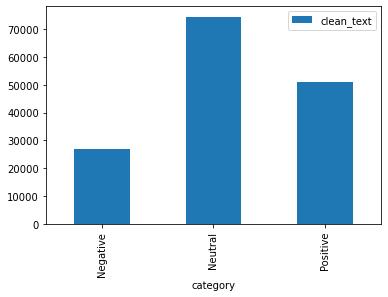

In [944]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

<AxesSubplot:>

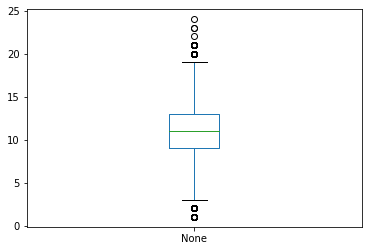

In [945]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df['clean_text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

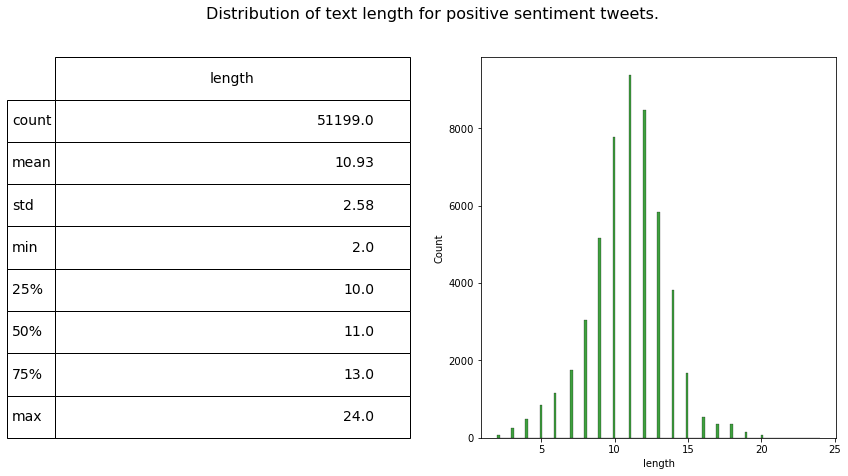

In [946]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

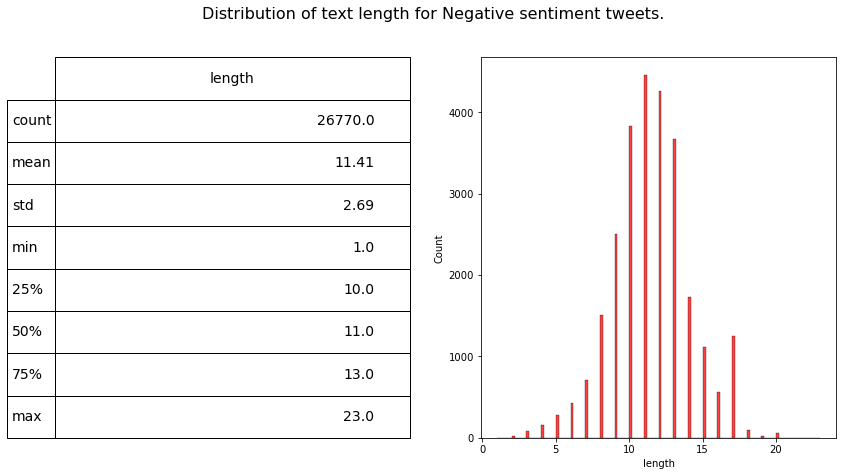

In [947]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

In [948]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

In [949]:
df.drop(['length'], axis=1, inplace=True)
df.head

<bound method NDFrame.head of                                                clean_text  category
0       folk said daikon past could treat cytokin stor...  Positive
1       world wrong side histori year hope biggest vac...  Negative
2       coronaviru sputnikv astrazeneca pfizerbiontech...  Positive
3       fact immut senat even your ethic sturdi enough...   Neutral
4       explain need vaccin borisjohnson matthancock w...   Neutral
...                                                   ...       ...
152411  karynmaughan mani vaccin cr17bankstat donor va...  Negative
152412  45 bbmp bengaluru covidvaccin avail 2407 1130a...  Positive
152413  45 urban bengaluru covidvaccin avail 2407 1130...  Positive
152414  1844 bbmp bengaluru covidvaccin avail 2407 110...  Positive
152415  1844 urban bengaluru covidvaccin avail 2407 11...  Positive

[152416 rows x 2 columns]>

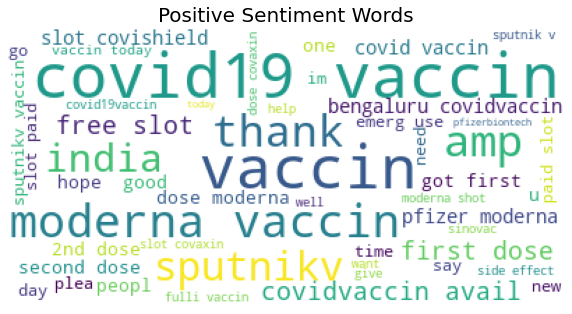

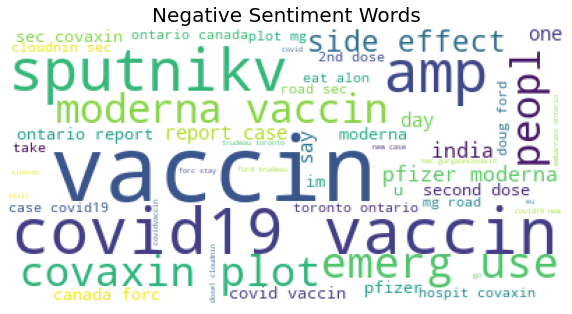

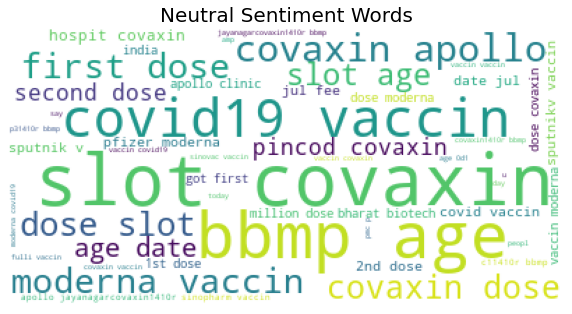

In [950]:

#### Visualizing data into wordclouds


from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'Positive')
     
# Negative tweet words
wordcount_gen(df, 'Negative')
     
# Neutral tweet words
wordcount_gen(df, 'Neutral')
     

In [951]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> folk said daikon past could treat cytokin storm pfizerbiontech

Processed tweet -> ['folk', 'said', 'daikon', 'past', 'could', 'treat', 'cytokin', 'storm', 'pfizerbiontech']


In [952]:
# Apply data processing to each tweet
X = list(map(tweet_to_words, df['clean_text']))

In [953]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [954]:
print(X[0])
print(Y[0])

['folk', 'said', 'daikon', 'past', 'could', 'treat', 'cytokin', 'storm', 'pfizerbiontech']
2


In [955]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [956]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [957]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['0', '000', '003', '004', '01', '0100pm', '01062021', '0107', '01072021', '0108', '01082021', '0130pm', '02', '0200pm', '02072021', '02082021', '0230pm', '03', '0300pm', '03072021', '03082021', '0330pm', '04', '0400pm', '04072021', '04082021', '0430pm', '05', '0500pm', '05072021', '05082021', '0530pm', '06', '06082021', '0700am', '0730am', '0800am', '08062021', '0830am', '0900am', '09062021', '0930am', '0d1', '0d2', '1', '10', '100', '1000', '10000', '100000', '1000am', '10062021', '100d1', '100d2', '100m', '101', '101102', '1012', '1030am', '1074', '10d1', '10d2', '10downingstreet', '10th', '11', '110', '1100am', '11062021', '111', '11200r', '11250r', '1130am', '114', '11410r', '1145', '115', '116', '1188', '119', '11d1', '11d2', '11panchaseela', '11th', '12', '120', '1200', '1200pm', '12062021', '1207', '1215', '1217', '122001', '122002', '122003', '122009', '122018', '123', '1230pm', '125', '1250', '1260', '12d1', '12d2', '12th', '13', '130', '13062021', '1307', '13072021', '135', 

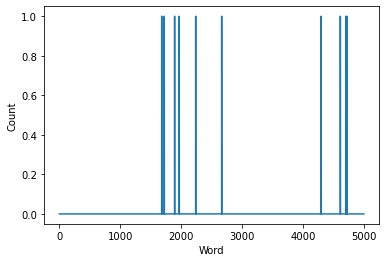

In [958]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [959]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 folk said daikon past could treat cytokin storm pfizerbiontech
After Tokenization & Padding 
 [1158  104 1110  220 2334   25    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [960]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [961]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (91449, 50) (91449, 3)
Validation Set -> (30483, 50) (30483, 3)
Test Set -> (30484, 50) (30484, 3)


In [962]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [963]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [964]:
import tensorflow as tf


In [965]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 20
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 50, 32)            160000    
                                                                 
 conv1d_21 (Conv1D)          (None, 50, 32)            3104      
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 25, 32)           0         
 g1D)                                                            
                                                                 
 bidirectional_21 (Bidirecti  (None, 64)               16640     
 onal)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 3)               

In [966]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8946
Precision : 0.9032
Recall    : 0.8855
F1 Score  : 0.8943


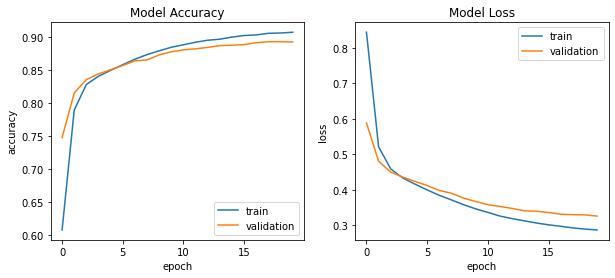

In [967]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

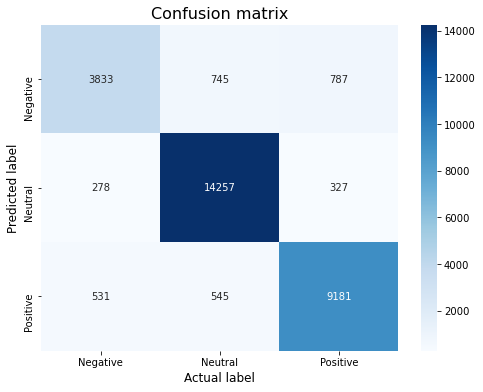

In [968]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

In [969]:
# Save the model architecture & the weights
model.save('best_model.h5')
print('Best model saved')

Best model saved


In [970]:
from keras.models import load_model

# Load model
model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [971]:
predict_class(['"There have not been many bright days in 2020 but here are some of the best'])

The predicted sentiment is Positive


In [972]:
predict_class(['"vaccine is bad for health'])

The predicted sentiment is Negative
